# Problem

Suppose you have the following  dataset, which contains information about a year's worth of weather. Using Python (Pandas), create some quick plots to show the following:


    

    
- The median temperature by month

    
- The median wind speed by month

    
- The snowiest months (Hint: this one will require manipulating and classifying the existing data.)


In [18]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/weather_2012.csv', parse_dates=True, index_col='Date/Time')

In [3]:
df.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [16]:
df.shape

(8784, 7)

### Solution

**Question 1**: The median temperature by month

This question is relatively simple: we can group the data by months because of the datetime index, and apply the median function while we plot the graph... 

<AxesSubplot:xlabel='Date/Time'>

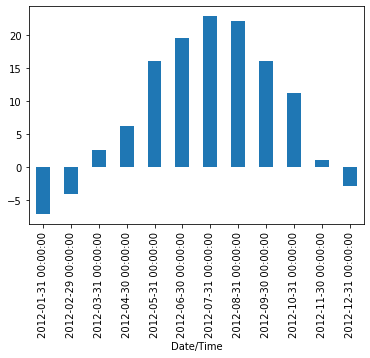

In [19]:
df['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

**Question 2:** The median wind speed by month

This is very similar to question 1. We can just substitute the wind speed for the temperature and use the same code as above...

<AxesSubplot:xlabel='Date/Time'>

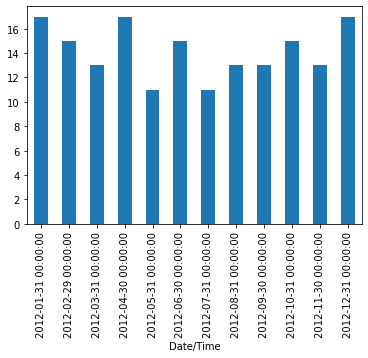

In [20]:
df['Wind Spd (km/h)'].resample('M').apply(np.median).plot(kind='bar')

**Question 1**: The median temperature by month

This question is much trickier since we have to essentially count the number of instances Snow appears in the Weather column. However, there are multiple possibilities, since the column is in string format.  Lets see how many unique weather descriptions there are... 

In [23]:
df['Weather'].nunique()

50

50 isnt too bad. We can manually inspect the different weather combinations usig the following code. 

In [30]:
descriptions = df.groupby(['Weather']).size().reset_index(name='counts').copy()
descriptions

,Weather,counts
0,Clear,1326
1,Cloudy,1728
2,Drizzle,41
3,"Drizzle,Fog",80
4,"Drizzle,Ice Pellets,Fog",1
5,"Drizzle,Snow",2
6,"Drizzle,Snow,Fog",15
7,Fog,150
8,Freezing Drizzle,7
9,"Freezing Drizzle,Fog",6


We see there are many instances that contain the word "Snow", sometimes by itself but also with other descriptors. We need to run a code that will only identify the word "Snow". We can then use Boolean syntax to create a column that is either True or False if 'Snow' appears in the corresponding row of the Weather column

In [35]:
Snow = df['Weather'].str.contains('Snow')

In [36]:
Snow

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
                       ...  
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Weather, Length: 8784, dtype: bool

Now we can plot plot the True values by converting it to a float, which will essentially turn True into 1 while False will be converted to 0. 

<AxesSubplot:xlabel='Date/Time'>

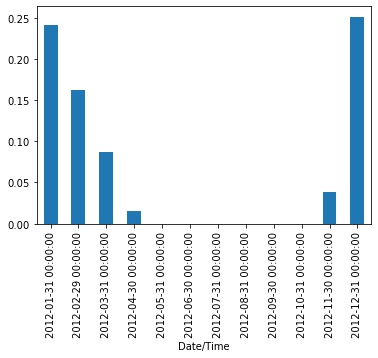

In [37]:
Snow.astype(float).resample('M').apply(np.mean).plot(kind='bar')

We can see that December and January are the snowiest months, followed by February, March, November and April. This makes sense for countries in the Northern Hemisphere, above a certain latitude. 